In [1]:
import pandas as pd
import numpy as np
from numpy.random import seed
seed(123)
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import seaborn as sns
import geopandas as gpd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
import xgboost as xgb
from xgboost import plot_importance
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score
import time
from keras import models, layers, optimizers, regularizers
from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG
from statsmodels.tsa.seasonal import seasonal_decompose

Using TensorFlow backend.


In [2]:
jan=pd.read_csv("listings_jan.csv")
Feb=pd.read_csv("listings_feb.csv")
april=pd.read_csv("listings_april.csv")
march=pd.read_csv("listings_march.csv")
May=pd.read_csv("listings_may.csv")
June=pd.read_csv("listings_june.csv")
July=pd.read_csv("listings_july.csv")
August=pd.read_csv("listings_aug.csv")
Sep=pd.read_csv("listings_sep.csv")
Oct=pd.read_csv("listings_oct.csv")
Nov=pd.read_csv("listings_nov.csv")
Nov_1=pd.read_csv("listings_nov1.csv")
Nov_2=pd.read_csv("listings_nov2.csv")
Dec=pd.read_csv("listings_dec.csv")

C:\Users\wabug\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (43,61,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\wabug\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (61,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
airbnb_df=pd.concat([jan,Feb,april,march,May,June,July,August,Sep,Oct,Nov,Nov_1,Nov_2,Dec])

In [4]:
airbnb_df

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,109,https://www.airbnb.com/rooms/109,20190111191840,2019-01-12,Amazing bright elegant condo park front *UPGRA...,"*** Unit upgraded with new bamboo flooring, br...","*** Unit upgraded with new bamboo flooring, br...","*** Unit upgraded with new bamboo flooring, br...",none,NaN,...,f,f,strict_14_with_grace_period,t,f,1,1,0,0,0.02
1,344,https://www.airbnb.com/rooms/344,20190111191840,2019-01-12,Family perfect;Pool;Near Studios!,This home is perfect for families; aspiring ch...,"Cheerful & comfortable; near studios, amusemen...",This home is perfect for families; aspiring ch...,none,Quiet-yet-close to all the fun in LA! Hollywoo...,...,t,f,flexible,f,f,1,1,0,0,0.13
2,2708,https://www.airbnb.com/rooms/2708,20190111191840,2019-01-11,Gold Memory Foam Bed & Breakfast in West Holly...,Our best memory foam pillows you'll ever sleep...,Flickering fireplace display heater. Decorate...,Our best memory foam pillows you'll ever sleep...,none,We are minutes away from the Mentor Language I...,...,t,f,strict_14_with_grace_period,f,f,2,0,2,0,0.25
3,2732,https://www.airbnb.com/rooms/2732,20190111191840,2019-01-12,Zen Life at the Beach,NaN,This is a three story townhouse with the follo...,This is a three story townhouse with the follo...,none,NaN,...,f,f,strict_14_with_grace_period,f,f,2,1,1,0,0.19
4,2864,https://www.airbnb.com/rooms/2864,20190111191840,2019-01-11,*Upscale Professional Home with Beautiful Studio*,Centrally located.... Furnished with 42 inch S...,The space is furnished with Thomasville furnit...,Centrally located.... Furnished with 42 inch S...,none,What makes the neighborhood unique is that the...,...,f,f,strict_14_with_grace_period,f,f,1,1,0,0,NaN
5,3021,https://www.airbnb.com/rooms/3021,20190111191840,2019-01-12,Hollywood Hills Zen Modern style Apt/Guesthouse,A very Modern Hollywood Hills Zen style galler...,Stay amongst the Stars when you visit the Holl...,A very Modern Hollywood Hills Zen style galler...,none,This is the famous Hollywood hills.. Historica...,...,f,f,strict_14_with_grace_period,f,f,3,1,2,0,0.35
6,5728,https://www.airbnb.com/rooms/5728,20190111191840,2019-01-12,Tiny Home in Artistic Oasis near Venice and LAX,Our home is located near Venice Beach without ...,Do you want to live in paradise? We have a ver...,Our home is located near Venice Beach without ...,none,Our neighborhood is very quiet and save. There...,...,t,f,moderate,f,f,4,1,3,0,1.86
7,5729,https://www.airbnb.com/rooms/5729,20190111191840,2019-01-12,Zen Room with Floating Bed near Venice and LAX,Our home is located near Venice Beach without ...,Do you want to stay in paradise? We are close ...,Our home is located near Venice Beach without ...,none,Our neighborhood is very quiet and save. There...,...,t,f,moderate,f,f,4,1,3,0,1.23
8,5843,https://www.airbnb.com/rooms/5843,20190111191840,2019-01-12,Artist Oasis near Venice Beach w/ Beautiful Ga...,Do you want a taste of Paradise? Our one-of-a-...,"Our home, “THE CIRCLE” is known to the local L...",Do you want a taste of Paradise? Our one-of-a-...,none,Our neighborhood is very quiet and save. There...,...,t,f,moderate,f,f,4,1,3,0,0.74
9,6033,https://www.airbnb.com/rooms/6033,20190111191840,2019-01-11,Poolside Serenity Studio,Our distinctive bachelor's studio for 1-2 gues...,Welcome to your private entrance studio that i...,Our distinctive bachelor's studio for 1-2 gues...,none,NaN,...,f,f,strict_14_with_grace_period,f,f,5,2,3,0,0.19


In [5]:
cols_to_drop = ['listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'space', 'description', 
                'neighborhood_overview', 'notes', 'transit', 'access', 'interaction', 'house_rules',
                'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_id', 'host_url', 'host_name',
                'host_location', 'host_about', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_verifications',
                'calendar_last_scraped']
la_df = airbnb_df.drop(cols_to_drop, axis=1)

In [6]:
la_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 606496 entries, 0 to 40124
Data columns (total 79 columns):
id                                              606496 non-null int64
experiences_offered                             606496 non-null object
host_since                                      605876 non-null object
host_response_time                              478899 non-null object
host_response_rate                              478899 non-null object
host_acceptance_rate                            0 non-null float64
host_is_superhost                               605876 non-null object
host_listings_count                             605876 non-null float64
host_total_listings_count                       605876 non-null float64
host_has_profile_pic                            605876 non-null object
host_identity_verified                          605876 non-null object
street                                          606496 non-null object
neighbourhood                            

Find the null values in all the columns remaining

In [7]:
la_df.isna().sum()

id                                                   0
experiences_offered                                  0
host_since                                         620
host_response_time                              127597
host_response_rate                              127597
host_acceptance_rate                            606496
host_is_superhost                                  620
host_listings_count                                620
host_total_listings_count                          620
host_has_profile_pic                               620
host_identity_verified                             620
street                                               0
neighbourhood                                    34213
neighbourhood_cleansed                               0
neighbourhood_group_cleansed                         0
city                                               269
state                                               37
zipcode                                           7144
market    

In [8]:
la_df.drop(['host_acceptance_rate', 'neighbourhood_group_cleansed', 'square_feet', 'weekly_price', 'monthly_price', 'license', 'jurisdiction_names'], axis=1, inplace=True)

la_df.set_index('id', inplace=True) # The id will be used as the index, as this could be useful in future e.g. if a separate dataset containing reviews for each property is linked to this one

In [9]:
print(sum((la_df.host_listings_count == la_df.host_total_listings_count) == False))
la_df.loc[((la_df.host_listings_count == la_df.host_total_listings_count) == False)][:5]

620


,experiences_offered,host_since,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,street,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,
6900415,none,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Los Angeles, CA, United States",...,f,f,flexible,f,f,1,1,0,0,NaN
10034835,none,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Los Angeles, CA, United States",...,f,f,moderate,f,f,1,0,1,0,0.05
6900415,none,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Los Angeles, CA, United States",...,f,f,flexible,f,f,1,1,0,0,NaN
10034835,none,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Los Angeles, CA, United States",...,f,f,moderate,f,f,1,0,1,0,0.05
6900415,none,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Los Angeles, CA, United States",...,f,f,flexible,f,f,1,1,0,0,NaN


There are multiple columns for property location, including an attempt by the site that originally scraped the data to clean up the neighbourhood locations. Some of these columns can be dropped. Because all of the listings are in Los Angeles, columns relating to city and country can be dropped. One column for area will be kept - 'neighboorhood_cleansed'. Latitude and longitude will be saved in a dataframe for later use (see modelling section below).

In [10]:
lat_long = la_df[['latitude', 'longitude']]

In [11]:
la_df.drop(['zipcode', 'latitude', 'longitude', 'street', 'neighbourhood', 'city', 'state', 'market', 'smart_location', 'country_code', 'country', 'is_location_exact'], axis=1, inplace=True)

There are multiple columns for minimum and maximum night stays, but the two main ones will be used as there are few differences between e.g. minimum_nights and minimum_minimum_nights. The latter presumably refers to the fact that min/max night stays can vary over the year. The default (i.e. most frequently applied) min/max night stay values will be used instead.

In [12]:
#find the sum of the minimum nights
sum((la_df.minimum_nights == la_df.minimum_minimum_nights) == False)

25769

In [13]:
#drop'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm'
la_df.drop(['minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm'], axis=1, inplace=True)

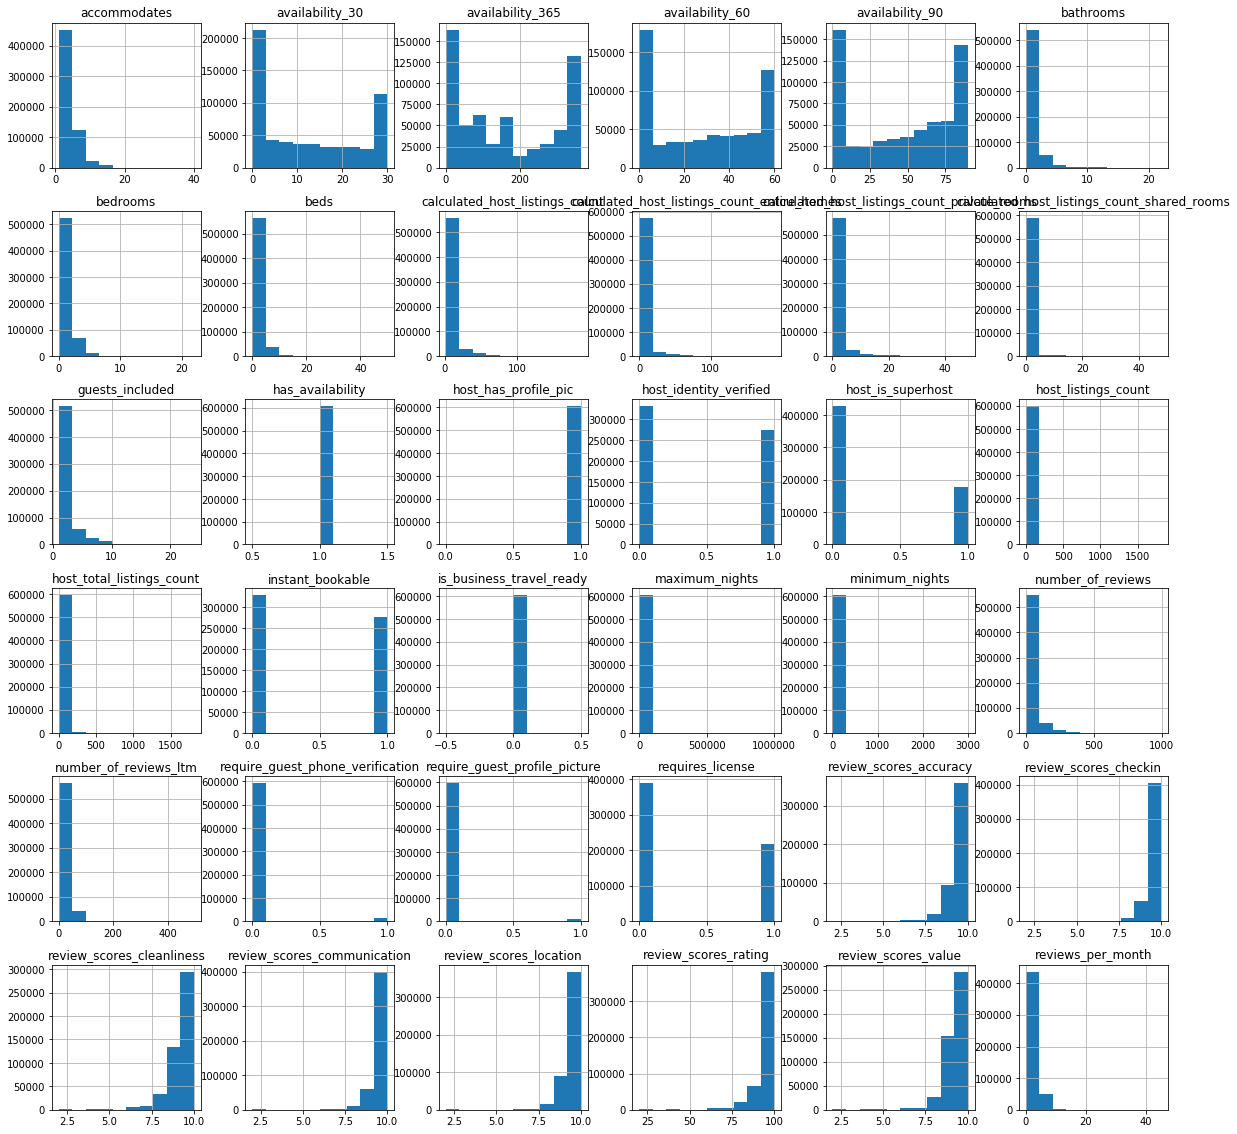

In [14]:
# Replacing columns with f/t with 0/1
la_df.replace({'f': 0, 't': 1}, inplace=True)

# Plotting the distribution of numerical and boolean categories
la_df.hist(figsize=(20,20));

From the above histograms it can be seen that some of the columns only contail one category and hence can be dropped


In [15]:

la_df.drop(['has_availability', 'host_has_profile_pic', 'is_business_travel_ready', 'require_guest_phone_verification', 'require_guest_profile_picture', 'requires_license'], axis=1, inplace=True)

## Cleaning columns one by one

### Host since

This is a datetime column, and will be converted into a measure of the number of days that a host has been on the platform, measured from the date that the data was scraped. The original column will be left in initially for EDA, and dropped later.

In [16]:

# Converting to datetime
la_df.host_since = pd.to_datetime(la_df.host_since) 

# Calculating the number of days
la_df['host_days_active'] = (datetime(2019, 4, 9) - la_df.host_since).astype('timedelta64[D]')

# Printing mean and median
print("Mean days as host:", round(la_df['host_days_active'].mean(),0))
print("Median days as host:", la_df['host_days_active'].median())

# Replacing null values with the median
la_df.host_days_active.fillna(la_df.host_days_active.median(), inplace=True)

Mean days as host: 1322.0
Median days as host: 1289.0


### experiences_offered

In [17]:
#most listings offer no experience hence can be dropped
la_df.experiences_offered.value_counts()
la_df.drop('experiences_offered', axis=1, inplace=True)

In [18]:
print("Null values:", la_df.host_response_time.isna().sum())
print(f"Proportion: {round((la_df.host_response_time.isna().sum()/len(la_df))*100, 1)}%")
# Number of rows without a value for host_response_time which have also not yet had a review
len(la_df[la_df.loc[ :,['host_response_time ', 'first_review'] ].isnull().sum(axis=1) == 2])

Null values: 127597
Proportion: 21.0%


C:\Users\wabug\Anaconda3\lib\site-packages\pandas\core\indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


117521

In [19]:
la_df.host_response_time.fillna("unknown", inplace=True)
la_df.host_response_time.value_counts(normalize=True)

within an hour        0.574592
unknown               0.210384
within a few hours    0.123958
within a day          0.070541
a few days or more    0.020524
Name: host_response_time, dtype: float64

In [20]:
la_df.host_response_time.value_counts(normalize=True)

within an hour        0.574592
unknown               0.210384
within a few hours    0.123958
within a day          0.070541
a few days or more    0.020524
Name: host_response_time, dtype: float64

### host_response_rate

In [21]:
print("Null values:", la_df.host_response_rate.isna().sum())
print(f"Proportion: {round((la_df.host_response_rate.isna().sum()/len(la_df))*100, 1)}%")

Null values: 127597
Proportion: 21.0%


In [22]:

# Removing the % sign from the host_response_rate string and converting to an integer
la_df.host_response_rate = la_df.host_response_rate.str[:-1].astype('float64')

print("Mean host response rate:", round(la_df['host_response_rate'].mean(),0))
print("Median host response rate:", la_df['host_response_rate'].median())
print(f"Proportion of 100% host response rates: {round(((la_df.host_response_rate == 100.0).sum()/la_df.host_response_rate.count())*100,1)}%")

Mean host response rate: 94.0
Median host response rate: 100.0
Proportion of 100% host response rates: 71.8%


In [23]:
# Bin into four categories
la_df.host_response_rate = pd.cut(la_df.host_response_rate, bins=[0, 50, 90, 99, 100], labels=['0-49%', '50-89%', '90-99%', '100%'], include_lowest=True)

# Converting to string
la_df.host_response_rate = la_df.host_response_rate.astype('str')

# Replace nulls with 'unknown'
la_df.host_response_rate.replace('nan', 'unknown', inplace=True)

# Category counts
la_df.host_response_rate.value_counts()

100%       343675
unknown    127597
90-99%      61631
50-89%      56155
0-49%       17438
Name: host_response_rate, dtype: int64

### host_is_superhost

There are 620 rows lacking values for each of five different host-related features. These rows will be droppe

In [24]:

# Number of rows without a value for multiple host-related columns
len(la_df[la_df.loc[ :,['host_since ', 'host_is_superhost', 'host_listings_count', 'host_has_profile_pic', 'host_identity_verified'] ].isnull().sum(axis=1) == 5])

620

In [25]:
la_df.dropna(subset=['host_since'], inplace=True)

### property_type

Some cleaning of property types is required as there are a large number of categories with only a few listings. The categories 'apartment', 'house' and 'other' will be used, as most properties can be classified as either apartments or houses.

In [26]:
la_df.property_type.value_counts()

Apartment                 221627
House                     207390
Condominium                34793
Guesthouse                 31739
Guest suite                20561
Townhouse                  18989
Bungalow                   16849
Villa                      13792
Loft                       13194
Serviced apartment          4288
Hostel                      4064
Cottage                     2637
Bed and breakfast           2583
Camper/RV                   2375
Boutique hotel              2309
Other                       1920
Tiny house                  1137
Cabin                       1086
Aparthotel                   963
Hotel                        723
Farm stay                    432
Tent                         324
Boat                         297
Castle                       231
Earth house                  214
Chalet                       192
Treehouse                    173
Dome house                   146
Yurt                         140
Campsite                     114
Tipi      

In [27]:
la_df.property_type.replace({
    'Townhouse': 'House',
    'Serviced apartment': 'Apartment',
    'Loft': 'Apartment',
    'Bungalow': 'House',
    'Cottage': 'House',
    'Villa': 'House',
    'Tiny house': 'House',
    'Earth house': 'House',
    'Chalet': 'House'  
    }, inplace=True)

# Replacing other categories with 'other'
la_df.loc[~la_df.property_type.isin(['House', 'Apartment']), 'property_type'] = 'Other'

### beds,bathrooms,bedrooms

In [28]:
#replace the empty columns with the median
for col in ['bathrooms', 'bedrooms', 'beds']:
    la_df[col].fillna(la_df[col].median(), inplace=True)

### bed_type

In [29]:
la_df.bed_type.value_counts()

Real Bed         598936
Futon              2698
Pull-out Sofa      1736
Airbed             1499
Couch              1007
Name: bed_type, dtype: int64

In [30]:
#most of the column has the same categories so is suitable to drop
la_df.drop('bed_type', axis=1, inplace=True)

### amenities

In [31]:
#create a feature to show all amenities
amenities_list = list(la_df.amenities)
amenities_list_string = " ".join(amenities_list)
amenities_list_string = amenities_list_string.replace('{', '')
amenities_list_string = amenities_list_string.replace('}', ',')
amenities_list_string = amenities_list_string.replace('"', '')
amenities_set = [x.strip() for x in amenities_list_string.split(',')]
amenities_set = set(amenities_set)
amenities_set

{'',
 '24-hour check-in',
 'Accessible-height bed',
 'Accessible-height toilet',
 'Air conditioning',
 'Air hockey table',
 'Air purifier',
 'Alarm system',
 'Alfresco bathtub',
 'Alfresco shower',
 'Amazon Echo',
 'Apple TV',
 'BBQ grill',
 'Baby bath',
 'Baby equipment',
 'Baby monitor',
 'Babysitter recommendations',
 'Balcony',
 'Bar',
 'Basketball court',
 'Bath towel',
 'Bathroom essentials',
 'Bathtub',
 'Bathtub with bath chair',
 'Beach chairs',
 'Beach essentials',
 'Beach view',
 'Beachfront',
 'Bed linens',
 'Bedroom comforts',
 'Bicycle',
 'Bidet',
 'Blu-Ray player',
 'Boat',
 'Bocce ball court',
 'Body soap',
 'Boogie boards',
 'Breakfast',
 'Breakfast bar',
 'Breakfast table',
 'Brick oven',
 'Building staff',
 'Buzzer/wireless intercom',
 'Cable TV',
 'Canoe',
 'Carbon monoxide detector',
 'Cat(s)',
 'Ceiling fan',
 'Ceiling fans',
 'Ceiling hoist',
 'Central air conditioning',
 'Changing table',
 'Chapel',
 'Charcoal barbeque',
 "Chef's kitchen",
 "Children's toys",
 '

Some of the amenities affect the price compare to others for example a pool affects the price as compared to Netflix.

In [32]:

la_df.loc[la_df['amenities'].str.contains('Amazon Echo|Apple TV|Game console|Netflix|Projector and screen|Smart TV'), 'high_end_electronics'] = 1
la_df.loc[la_df['amenities'].str.contains('BBQ grill|Fire pit|Propane barbeque'), 'bbq'] = 1
la_df.loc[la_df['amenities'].str.contains('Balcony|Patio'), 'balcony'] = 1
la_df.loc[la_df['amenities'].str.contains('Beach view|Beachfront|Lake access|Mountain view|Ski-in/Ski-out|Waterfront'), 'nature_and_views'] = 1
la_df.loc[la_df['amenities'].str.contains('Bed linens'), 'bed_linen'] = 1
la_df.loc[la_df['amenities'].str.contains('Breakfast'), 'breakfast'] = 1
la_df.loc[la_df['amenities'].str.contains('TV'), 'tv'] = 1
la_df.loc[la_df['amenities'].str.contains('Coffee maker|Espresso machine'), 'coffee_machine'] = 1
la_df.loc[la_df['amenities'].str.contains('Cooking basics'), 'cooking_basics'] = 1
la_df.loc[la_df['amenities'].str.contains('Dishwasher|Dryer|Washer'), 'white_goods'] = 1
la_df.loc[la_df['amenities'].str.contains('Elevator'), 'elevator'] = 1
la_df.loc[la_df['amenities'].str.contains('Exercise equipment|Gym|gym'), 'gym'] = 1
la_df.loc[la_df['amenities'].str.contains('Family/kid friendly|Children|children'), 'child_friendly'] = 1
la_df.loc[la_df['amenities'].str.contains('parking'), 'parking'] = 1
la_df.loc[la_df['amenities'].str.contains('Garden|Outdoor|Sun loungers|Terrace'), 'outdoor_space'] = 1
la_df.loc[la_df['amenities'].str.contains('Host greets you'), 'host_greeting'] = 1
la_df.loc[la_df['amenities'].str.contains('Hot tub|Jetted tub|hot tub|Sauna|Pool|pool'), 'hot_tub_sauna_or_pool'] = 1
la_df.loc[la_df['amenities'].str.contains('Internet|Pocket wifi|Wifi'), 'internet'] = 1
la_df.loc[la_df['amenities'].str.contains('Long term stays allowed'), 'long_term_stays'] = 1
la_df.loc[la_df['amenities'].str.contains('Pets|pet|Cat(s)|Dog(s)'), 'pets_allowed'] = 1
la_df.loc[la_df['amenities'].str.contains('Private entrance'), 'private_entrance'] = 1
la_df.loc[la_df['amenities'].str.contains('Safe|Security system'), 'secure'] = 1
la_df.loc[la_df['amenities'].str.contains('Self check-in'), 'self_check_in'] = 1
la_df.loc[la_df['amenities'].str.contains('Smoking allowed'), 'smoking_allowed'] = 1
la_df.loc[la_df['amenities'].str.contains('Step-free access|Wheelchair|Accessible'), 'accessible'] = 1
la_df.loc[la_df['amenities'].str.contains('Suitable for events'), 'event_suitable'] = 1

C:\Users\wabug\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.


To reduce the number of features reduce the number of amenities

In [33]:
# Replacing nulls with zeros for new columns
cols_to_replace_nulls = la_df.iloc[:,41:].columns
la_df[cols_to_replace_nulls] = la_df[cols_to_replace_nulls].fillna(0)

# Produces a list of amenity features where one category (true or false) contains fewer than 10% of listings
infrequent_amenities = []
for col in la_df.iloc[:,41:].columns:
    if la_df[col].sum() < len(la_df)/10:
        infrequent_amenities.append(col)
print(infrequent_amenities)

# Dropping infrequent amenity features
la_df.drop(infrequent_amenities, axis=1, inplace=True)

# Dropping the original amenity feature
la_df.drop('amenities', axis=1, inplace=True)

['high_end_electronics', 'nature_and_views', 'smoking_allowed', 'event_suitable']


In [34]:
la_df.columns[40:]

Index(['calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month',
       'host_days_active', 'bbq', 'balcony', 'bed_linen', 'breakfast', 'tv',
       'coffee_machine', 'cooking_basics', 'white_goods', 'elevator', 'gym',
       'child_friendly', 'parking', 'outdoor_space', 'host_greeting',
       'hot_tub_sauna_or_pool', 'internet', 'long_term_stays', 'pets_allowed',
       'private_entrance', 'secure', 'self_check_in', 'accessible'],
      dtype='object')

### price

In [35]:

#Price will be converted to an integer - currently it is a string because there is a currency sign.
la_df.price = la_df.price.str[1:-3]
la_df.price = la_df.price.str.replace(",", "")
la_df.price = la_df.price.astype('int64')

### security_deposit

In [36]:
#find the nulls in the column 
la_df.security_deposit.isna().sum()

149465

In [37]:
#convert the column into an integer and fill the nulls with zero
la_df.security_deposit = la_df.security_deposit.str[1:-3]
la_df.security_deposit = la_df.security_deposit.str.replace(",", "")
la_df.security_deposit.fillna(0, inplace=True)
la_df.security_deposit = la_df.security_deposit.astype('int64')

In [38]:
la_df.security_deposit.isna().sum()

0

### cleaning_fee

We will do the same as we did with security_deposit and price

In [39]:
la_df.cleaning_fee.isna().sum()

81739

In [40]:
la_df.cleaning_fee = la_df.cleaning_fee.str[1:-3]
la_df.cleaning_fee = la_df.cleaning_fee.str.replace(",", "")
la_df.cleaning_fee.fillna(0, inplace=True)
la_df.cleaning_fee = la_df.cleaning_fee.astype('int64')

In [41]:
la_df.cleaning_fee.isna().sum()

0

### extra_people
Since has the $ sign we will do the same as price

In [42]:
la_df.extra_people = la_df.extra_people.str[1:-3]
la_df.extra_people = la_df.extra_people.str.replace(",", "")
la_df.extra_people.fillna(0, inplace=True)
la_df.extra_people = la_df.extra_people.astype('int64')

In [43]:
la_df.extra_people.isna().sum()

0

In [44]:
# drop the calendar updated column since the column can be updated due to various reasons
la_df.drop('calendar_updated', axis=1, inplace=True)

### availability

There are multiple different measures of availability, which will be highly correlated with each other. Only one will be retained - for 90 days. This is because in Los Angeles it is illegal to have short-term (e.g. Airbnb) guests paying to stay in your property for more than 120 days each calendar year, so this is the maximum that should theoretically be possible.

In [45]:
la_df.drop(['availability_30', 'availability_60', 'availability_365'], axis=1, inplace=True)

### first_review and last_review
The reviews affect the people's urge of booking a house and hence affect the price,some of the data is Nan and we cannot drop them because we will lose alot of useful information ,we can't also fill it up with mean or median because it will make most of the data skewed .We will therefore put it in an unknown category

In [46]:
print(f"Null values in 'first_review': {round(100*la_df.first_review.isna().sum()/len(la_df),1)}%")
print(f"Null values in 'review_scores_rating': {round(100*la_df.review_scores_rating .isna().sum()/len(la_df),1)}%")

Null values in 'first_review': 19.4%
Null values in 'review_scores_rating': 20.7%


In [47]:
la_df.first_review = pd.to_datetime(la_df.first_review) # Converting to datetime
# Calculating the number of days between the first review and the date the data was scraped
la_df['time_since_first_review'] = (datetime(2019, 12,5 ) - la_df.first_review).astype('timedelta64[D]')

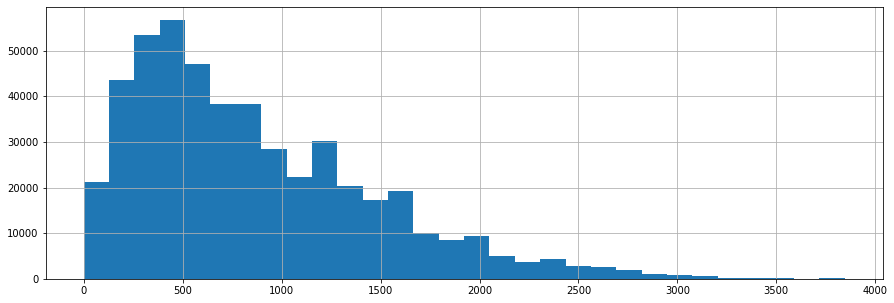

In [48]:
# Distribution of the number of days since first review
la_df.time_since_first_review.hist(figsize=(15,5), bins=30);

In [49]:

def bin_column(col, bins, labels, na_label='unknown'):
    """
    Takes in a column name, bin cut points and labels, replaces the original column with a
    binned version, and replaces nulls (with 'unknown' if unspecified).
    """
    la_df[col] = pd.cut(la_df[col], bins=bins, labels=labels, include_lowest=True)
    la_df[col] = la_df[col].astype('str')
    la_df[col].fillna(na_label, inplace=True)

In [50]:
# Binning time since first review
bin_column('time_since_first_review',
           bins=[0, 182, 365, 730, 1460, max(la_df.time_since_first_review)],
           labels=['0-6 months',
                   '6-12 months',
                   '1-2 years',
                   '2-3 years',
                   '4+ years'],
           na_label='no reviews')

The same will be done for the last review

In [51]:
# Dropping last_review - first_review will be kept for EDA and dropped later
la_df.drop('last_review', axis=1, inplace=True)

### reviews and ratings
As above, listings without reviews will be kept and replaced with 'unknown'. Other ratings will be grouped into bins. The histograms below were produced in order to decide on useful bins. The majority of ratings are 9 or 10 out of 10, as also seen in the value count below. Therefore for these columns, 9/10 and 10/10 will be kept as separate groups, and 1-8/10 will be binned together (as this is, by Airbnb standards, a 'low' rating).

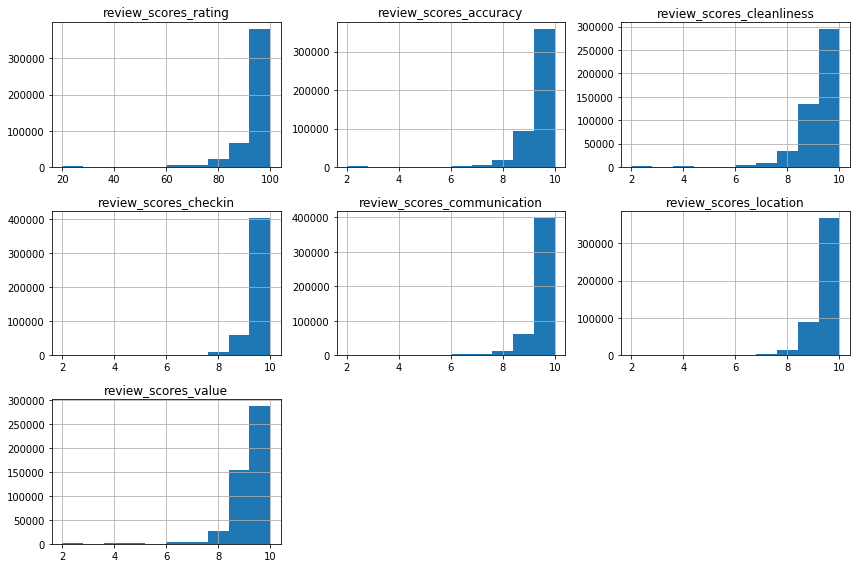

In [52]:
# Checking the distributions of the review ratings columns
variables_to_plot = list(la_df.columns[la_df.columns.str.startswith("review_scores") == True])
fig = plt.figure(figsize=(12,8))
for i, var_name in enumerate(variables_to_plot):
    ax = fig.add_subplot(3,3,i+1)
    la_df[var_name].hist(bins=10,ax=ax)
    ax.set_title(var_name)
fig.tight_layout()
plt.show()

In [53]:
# Binning for all columns scored out of 10
for col in variables_to_plot:
    bin_column(col,
               bins=[0, 8, 9, 10],
               labels=['0-8/10', '9/10', '10/10'],
               na_label='no reviews')

### cancellation_policy

In [54]:
la_df.cancellation_policy.value_counts()

strict_14_with_grace_period    256558
flexible                       178003
moderate                       164730
super_strict_60                  2855
strict                           2402
luxury_moderate                   958
super_strict_30                   200
luxury_super_strict_95            117
luxury_no_refund                   53
Name: cancellation_policy, dtype: int64

In [55]:

# Replacing categories
la_df.cancellation_policy.replace({
    'super_strict_30': 'strict_14_with_grace_period',
    'super_strict_60': 'strict_14_with_grace_period',
    'strict': 'strict_14_with_grace_period',
    'luxury_moderate': 'moderate',
    'luxury_no_refund': 'moderate',
    'luxury_super_strict_95': 'moderate'
    }, inplace=True)

In [56]:
#These will be highly correlated with number_of_reviews and so will be dropped.
la_df.drop(['number_of_reviews_ltm', 'reviews_per_month'], axis=1, inplace=True)

In [57]:
la_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 605876 entries, 109 to 40603848
Data columns (total 61 columns):
host_since                                      605876 non-null datetime64[ns]
host_response_time                              605876 non-null object
host_response_rate                              605876 non-null object
host_is_superhost                               605876 non-null float64
host_listings_count                             605876 non-null float64
host_total_listings_count                       605876 non-null float64
host_identity_verified                          605876 non-null float64
neighbourhood_cleansed                          605876 non-null object
property_type                                   605876 non-null object
room_type                                       605876 non-null object
accommodates                                    605876 non-null int64
bathrooms                                       605876 non-null float64
bedrooms             

## Time Series
### Data analysis

In [58]:
print(f"Of the Airbnb hosts that are still listing on the site, the first joined on {min(la_df.host_since).strftime('%d %B %Y')}, and the most recent joined on {max(la_df.host_since).strftime('%d %B %Y')}.")

Of the Airbnb hosts that are still listing on the site, the first joined on 03 March 2008, and the most recent joined on 05 December 2019.


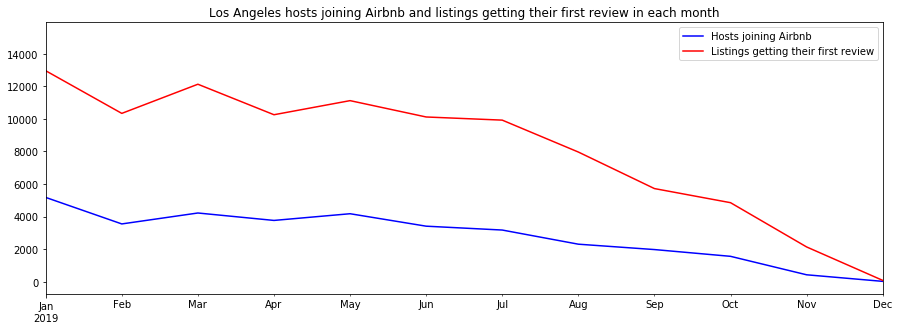

In [59]:

plt.figure(figsize=(15,5))
la_df.set_index('host_since').resample('MS').size().plot(label='Hosts joining Airbnb', color='blue')
la_df.set_index('first_review').resample('MS').size().plot(label='Listings getting their first review', color='red')
plt.title('Los Angeles hosts joining Airbnb and listings getting their first review in each month')
plt.legend()
plt.xlim('2019-01-01', '2019-12-31') # Limiting to whole months
plt.xlabel('')
plt.ylabel('')
plt.show()

C:\Users\wabug\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


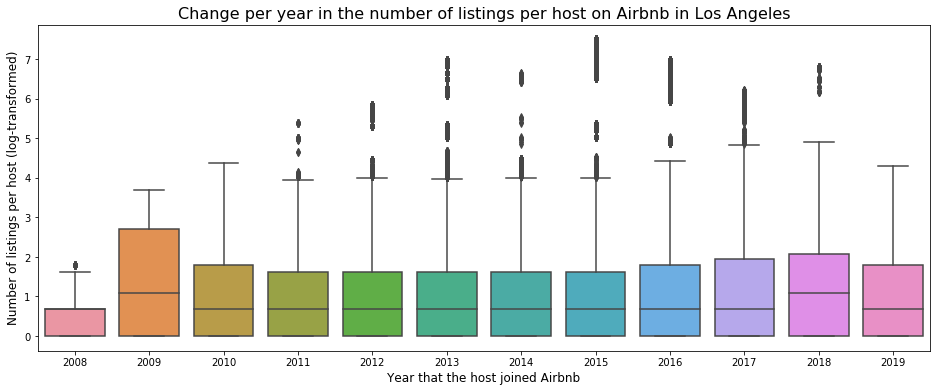

In [60]:
#plot a box plot  
plt.figure(figsize=(16,6))
#use numpy to transform the hostlistings using np.log
sns.boxplot(la_df.host_since.dt.year, np.log(la_df.host_listings_count))
plt.xlabel('Year that the host joined Airbnb', fontsize=12)
plt.ylabel('Number of listings per host (log-transformed)', fontsize=12)
plt.title('Change per year in the number of listings per host on Airbnb in Los Angeles', fontsize=16)
plt.show()

In [61]:
print("Average number of listings per host per year on Airbnb in Los Angeles:")
print(round(la_df.set_index('host_since').host_listings_count.resample('YS').mean(),2))

Average number of listings per host per year on Airbnb in Los Angeles:
host_since
2008-01-01     2.25
2009-01-01     9.63
2010-01-01     4.97
2011-01-01     5.44
2012-01-01     8.94
2013-01-01    18.87
2014-01-01     6.94
2015-01-01    38.74
2016-01-01    17.99
2017-01-01    15.73
2018-01-01     8.32
2019-01-01     5.83
Freq: AS-JAN, Name: host_listings_count, dtype: float64


C:\Users\wabug\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


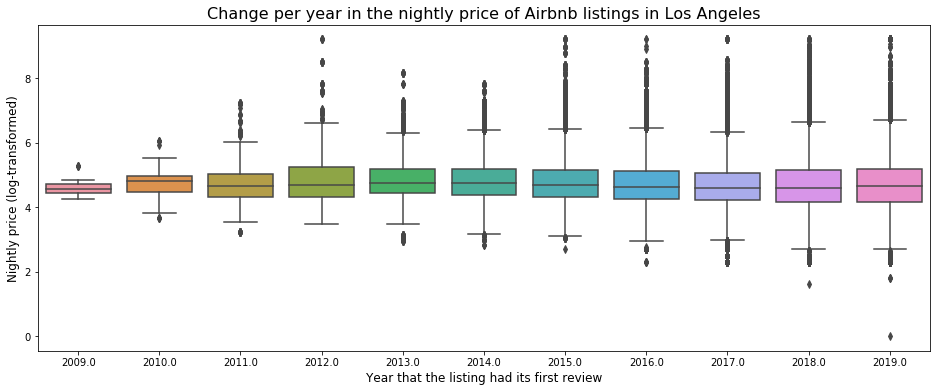

In [62]:
plt.figure(figsize=(16,6))
sns.boxplot(la_df.first_review.dt.year, np.log(la_df.price))
plt.xlabel('Year that the listing had its first review', fontsize=12)
plt.ylabel('Nightly price (log-transformed)', fontsize=12)
plt.title('Change per year in the nightly price of Airbnb listings in Los Angeles', fontsize=16)
plt.show()

According to the above boxplot the price ha increased in the last 10 years, especially the high end properties .This has resulted to the increase in mean as compared to the median

In [63]:
print("Mean nightly price of listings in each year on Airbnb in Los Angeles:")
print(round(la_df.set_index('first_review').price.resample('YS').mean(),2))

Mean nightly price of listings in each year on Airbnb in Los Angeles:
first_review
2009-01-01     99.85
2010-01-01    120.02
2011-01-01    140.90
2012-01-01    185.58
2013-01-01    172.33
2014-01-01    163.86
2015-01-01    170.54
2016-01-01    161.22
2017-01-01    158.57
2018-01-01    168.57
2019-01-01    169.82
Name: price, dtype: float64


In [64]:
# Dropping host_since and first_review as they are no longer needed
la_df.drop(['host_since', 'first_review'], axis=1, inplace=True)

In [65]:

la_df.describe()

,host_is_superhost,host_listings_count,host_total_listings_count,host_identity_verified,accommodates,bathrooms,bedrooms,beds,price,security_deposit,...,outdoor_space,host_greeting,hot_tub_sauna_or_pool,internet,long_term_stays,pets_allowed,private_entrance,secure,self_check_in,accessible
count,605876.000000,605876.000000,605876.000000,605876.000000,605876.000000,605876.00000,605876.000000,605876.000000,605876.000000,605876.000000,...,605876.000000,605876.00000,605876.000000,605876.000000,605876.000000,605876.000000,605876.000000,605876.000000,605876.000000,605876.000000
mean,0.295113,16.560831,16.560831,0.453454,3.673138,1.45886,1.428782,1.973224,209.085300,323.691760,...,0.212623,0.16427,0.273909,0.977154,0.320415,0.238905,0.381745,0.130263,0.356543,0.120086
std,0.456094,107.383527,107.383527,0.497829,2.661733,0.96457,1.105385,1.650198,565.063151,1727.209537,...,0.409163,0.37052,0.445963,0.149413,0.466637,0.426415,0.485815,0.336592,0.478979,0.325062
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,2.000000,1.00000,1.000000,1.000000,70.000000,0.000000,...,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,2.000000,2.000000,0.000000,3.000000,1.00000,1.000000,1.000000,109.000000,100.000000,...,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,6.000000,6.000000,1.000000,5.000000,2.00000,2.000000,2.000000,185.000000,300.000000,...,0.000000,0.00000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,1815.000000,1815.000000,1.000000,40.000000,22.00000,22.000000,50.000000,25000.000000,250000.000000,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Price

In [66]:
print(f"Nightly advertised prices range from ${min(la_df.price)} to ${max(la_df.price)}.")

Nightly advertised prices range from $0 to $25000.



Nightly advertised prices range from 0 dollars to 25,000 dollars. The extreme ends of the range are due to hosts not understanding how to use Airbnb advertised prices (sometimes called 'sticker' prices) correctly. The advertised prices can be set to any arbitrary amount, and these are the prices that show when dates are not entered on the site.

A model is only as good as its data, and unfortunately this model will be predicting advertised prices rather than the prices actually paid. Nevertheless, some cleaning of the particularly unhelpful values will be done. Very small values under  10 dollars will be increased to  10 dollars.

There are notable drop-offs in nightly prices at  200 dollars (first graph, orange line), 500 dollars (second graph, orange line) and  1,000 dollars (second graph, red line). Values above 1,000 dollars will be reduced to  1,000 dollars

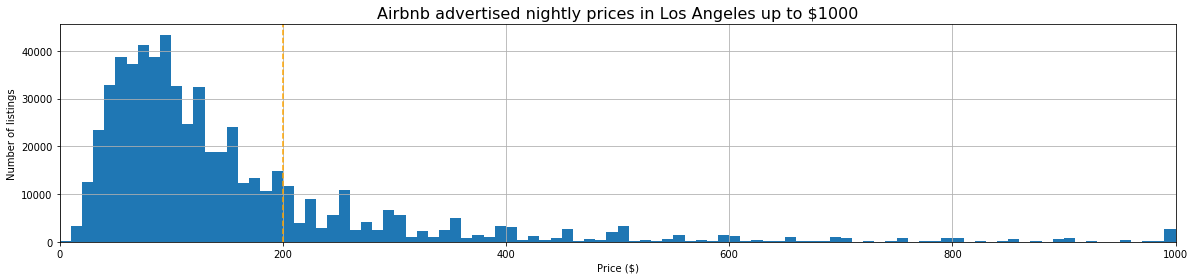

In [67]:

# Distribution of prices from $0 to $1000
plt.figure(figsize=(20,4))
la_df.price.hist(bins=100, range=(0,1000))
plt.margins(x=0)
plt.axvline(200, color='orange', linestyle='--')
plt.title("Airbnb advertised nightly prices in Los Angeles up to $1000", fontsize=16)
plt.xlabel("Price ($)")
plt.ylabel("Number of listings")
plt.show()

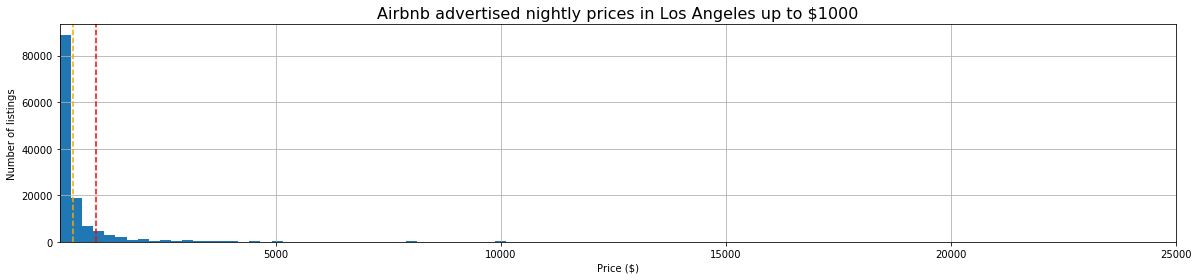

In [68]:
# Distribution of prices from £200 upwards
plt.figure(figsize=(20,4))
la_df.price.hist(bins=100, range=(200, max(la_df.price)))
plt.margins(x=0)
plt.axvline(500, color='orange', linestyle='--')
plt.axvline(1000, color='red', linestyle='--')
plt.title("Airbnb advertised nightly prices in Los Angeles up to $1000", fontsize=16)
plt.xlabel("Price ($)")
plt.ylabel("Number of listings")
plt.show()

In [69]:

# Replacing values under $10 with $10
la_df.loc[la_df.price <= 10, 'price'] = 10

# Replacing values over £1000 with £1000
la_df.loc[la_df.price >= 1000, 'price'] = 1000

## Host listings Count

In [70]:
print("Median number of listings per host:", int(la_df.host_listings_count.median()))
print("Mean number of listings per host:", int(round(la_df.host_listings_count.mean())))
print(f"{int(round(100*len(la_df[la_df.host_listings_count == 1])/len(la_df)))}% of listings are from hosts with one listing.")

Median number of listings per host: 2
Mean number of listings per host: 17
39% of listings are from hosts with one listing.


## Accommodates

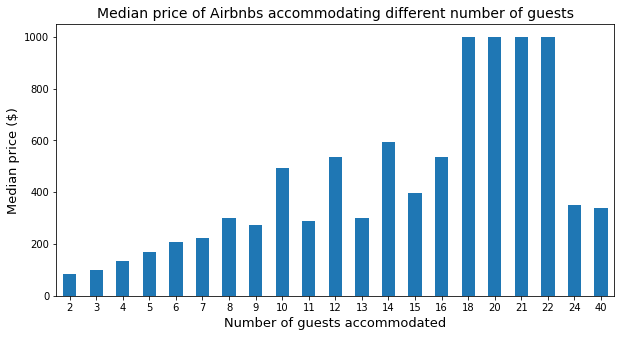

In [71]:
plt.figure(figsize=(10,5))
la_df.groupby('accommodates').price.median().plot(kind='bar')
plt.title('Median price of Airbnbs accommodating different number of guests', fontsize=14)
plt.xlabel('Number of guests accommodated', fontsize=13)
plt.ylabel('Median price ($)', fontsize=13)
plt.xticks(rotation=0)
plt.xlim(left=0.5)
plt.show()

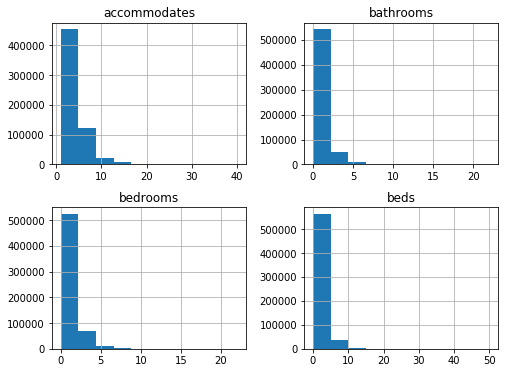

In [72]:
la_df[['accommodates', 'bathrooms', 'bedrooms', 'beds']].hist(figsize=(8,6));

## Categorical features

Categorical features will be explored and plotted, to gain insights and to determine whether or not they should be included in the final model.

In [73]:
# Renaming the neighbourhood column
la_df.rename(columns={'neighbourhood_cleansed': 'group'}, inplace=True)

# Importing the London borough boundary GeoJSON file as a dataframe in geopandas
map_df = gpd.read_file('neighbourhoods (1).geojson')
map_df.head()

,neighbourhood,neighbourhood_group,geometry
0,Angeles Crest,Unincorporated Areas,"MULTIPOLYGON (((-118.09667 34.47348, -118.0796..."
1,Acton,Unincorporated Areas,"MULTIPOLYGON (((-118.20703 34.53902, -118.1894..."
2,Agua Dulce,Unincorporated Areas,"MULTIPOLYGON (((-118.37822 34.48811, -118.3783..."
3,Athens,Unincorporated Areas,"MULTIPOLYGON (((-118.29152 33.93096, -118.2916..."
4,Alondra Park,Unincorporated Areas,"MULTIPOLYGON (((-118.32651 33.89757, -118.3264..."


In [74]:
# Dropping the empty column
map_df.drop('neighbourhood_group', axis=1, inplace=True)
# Creating a dataframe of listing counts and median price by borough
group_df = pd.DataFrame(la_df.groupby('group').size())
group_df.rename(columns={0: 'number_of_listings'}, inplace=True)
group_df['median_price'] = la_df.groupby('group').price.median().values
# Joining the dataframes
group_map_df = map_df.set_index('neighbourhood').join(group_df)

In [75]:
group_map_df

,geometry,number_of_listings,median_price
neighbourhood,,,
Angeles Crest,"MULTIPOLYGON (((-118.09667 34.47348, -118.0796...",83.0,140.0
Acton,"MULTIPOLYGON (((-118.20703 34.53902, -118.1894...",62.0,99.0
Agua Dulce,"MULTIPOLYGON (((-118.37822 34.48811, -118.3783...",183.0,79.0
Athens,"MULTIPOLYGON (((-118.29152 33.93096, -118.2916...",54.0,170.0
Alondra Park,"MULTIPOLYGON (((-118.32651 33.89757, -118.3264...",155.0,100.0
Altadena,"MULTIPOLYGON (((-118.15135 34.21551, -118.1408...",3276.0,99.0
Avocado Heights,"MULTIPOLYGON (((-118.00252 34.05333, -118.0022...",181.0,45.0
Littlerock,"MULTIPOLYGON (((-117.95810 34.52844, -117.9581...",NaN,NaN
Castaic,"MULTIPOLYGON (((-118.62455 34.49550, -118.6238...",239.0,63.0


## Property type

In [76]:
def category_count_plot(col, figsize=(8,4)):
    """
    Plots a simple bar chart of the total count for each category in the column specified.
    A figure size can optionally be specified.
    """
    plt.figure(figsize=figsize)
    la_df[col].value_counts().plot(kind='bar')
    plt.title(col)
    plt.xticks(rotation=0)
    plt.show()

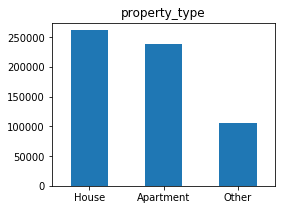

House        0.431111
Apartment    0.394650
Other        0.174239
Name: property_type, dtype: float64


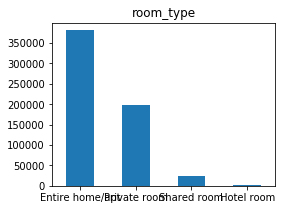

Entire home/apt    0.627998
Private room       0.327564
Shared room        0.040710
Hotel room         0.003728
Name: room_type, dtype: float64


In [77]:
for col in ['property_type', 'room_type']:
    category_count_plot(col, figsize=(4,3))
    print(la_df[col].value_counts(normalize=True))

43% of the properties are houses , 39% are apartment and ,17% are other

##  Reviews

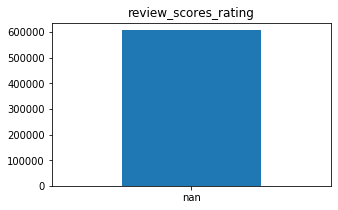

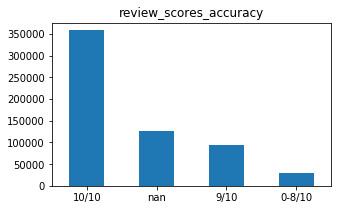

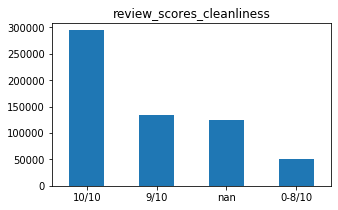

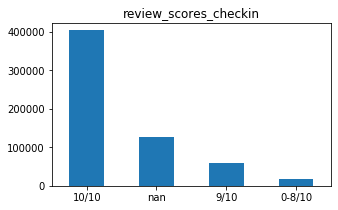

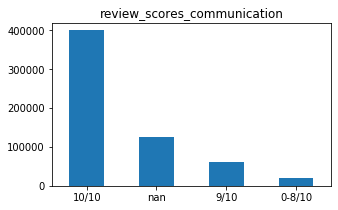

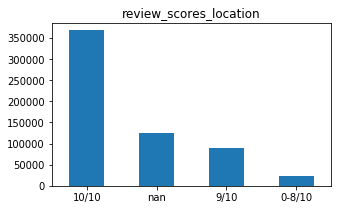

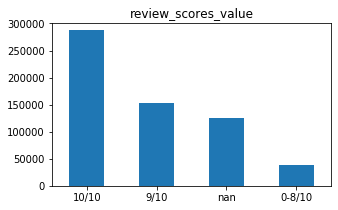

In [78]:


for col in list(la_df.columns[la_df.columns.str.startswith("review_scores") == True]):
    category_count_plot(col, figsize=(5,3))

## Boolean Values

In [79]:
def binary_count_and_price_plot(col, figsize=(8,3)):
    """
    Plots a simple bar chart of the counts of true and false categories in the column specified,
    next to a bar chart of the median price for each category.
    A figure size can optionally be specified.
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)
    fig.suptitle(col, fontsize=16, y=1)
    plt.subplots_adjust(top=0.80) # So that the suptitle does not overlap with the ax plot titles
    
    la_df.groupby(col).size().plot(kind='bar', ax=ax1, color=['firebrick', 'seagreen'])
    ax1.set_xticklabels(labels=['false', 'true'], rotation=0)
    ax1.set_title('Category count')
    ax1.set_xlabel('')
    
    la_df.groupby(col).price.median().plot(kind='bar', ax=ax2, color=['firebrick', 'seagreen'])
    ax2.set_xticklabels(labels=['false', 'true'], rotation=0)
    ax2.set_title('Median price ($)')
    ax2.set_xlabel('')
    
    plt.show()

### Superhost

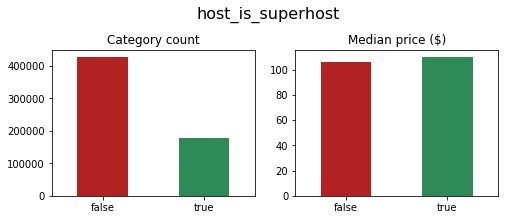

0.0    0.704887
1.0    0.295113
Name: host_is_superhost, dtype: float64


In [80]:
binary_count_and_price_plot('host_is_superhost')
print(la_df.host_is_superhost.value_counts(normalize=True))

# Data Modeling and Machine Learning

In [81]:
#categolical values one hot encoding
transformed_df = pd.get_dummies(la_df)

Areas of multi-collinearity:

>Beds, bedrooms, guests included and the number of people that a property accommodates are highly correlated. The number of people accommodated has traditionally been a more high priority search parameter on Airbnb, as it is more relevant for private and shared rooms than the number of bedrooms (and is still the second highest priority parameter when searching on the site, after dates (when read from left to right on the search page)).
>Unsurprisingly, there are perfect correlations between NaN reviews (i.e. listings that are not reviewed yet) for different review categories, and first and last review times. NaN categories can therefore be dropped.
>The same is true of unknown host response rates and times. One of these (rate) will be dropped.
There is a correlation between a 0-49% response rate, and an average response time of a few days or more. One of these (rate) will be dropped.
>There are strong negative correlations between houses and apartments, and between private rooms and entire homes (as these were the main two categories of their features before they were one-hot encoded). Although these are important categories, one of each will be dropped in order to reduce multi-collinearity (apartments and private rooms, as these are the second most common categories).

In [82]:
def multi_collinearity_heatmap(la_df, figsize=(11,9)):
    
    """
    Creates a heatmap of correlations between features in the df. A figure size can optionally be set.
    """
    
    # Set the style of the visualization
    sns.set(style="white")

    # Create a covariance matrix
    corr = la_df.corr()

    # Generate a mask the size of our covariance matrix
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=figsize)

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, vmax=corr[corr != 1.0].max().max());

In [83]:
# Dropping collinear features
to_drop = ['beds',
           'bedrooms',
           'guests_included', 
           'host_response_rate_unknown',
           'host_response_rate_0-49%',
           'property_type_Apartment',
           'room_type_Private room']
to_drop.extend(list(transformed_df.columns[transformed_df.columns.str.endswith('nan')]))

transformed_df.drop(to_drop, axis=1, inplace=True)

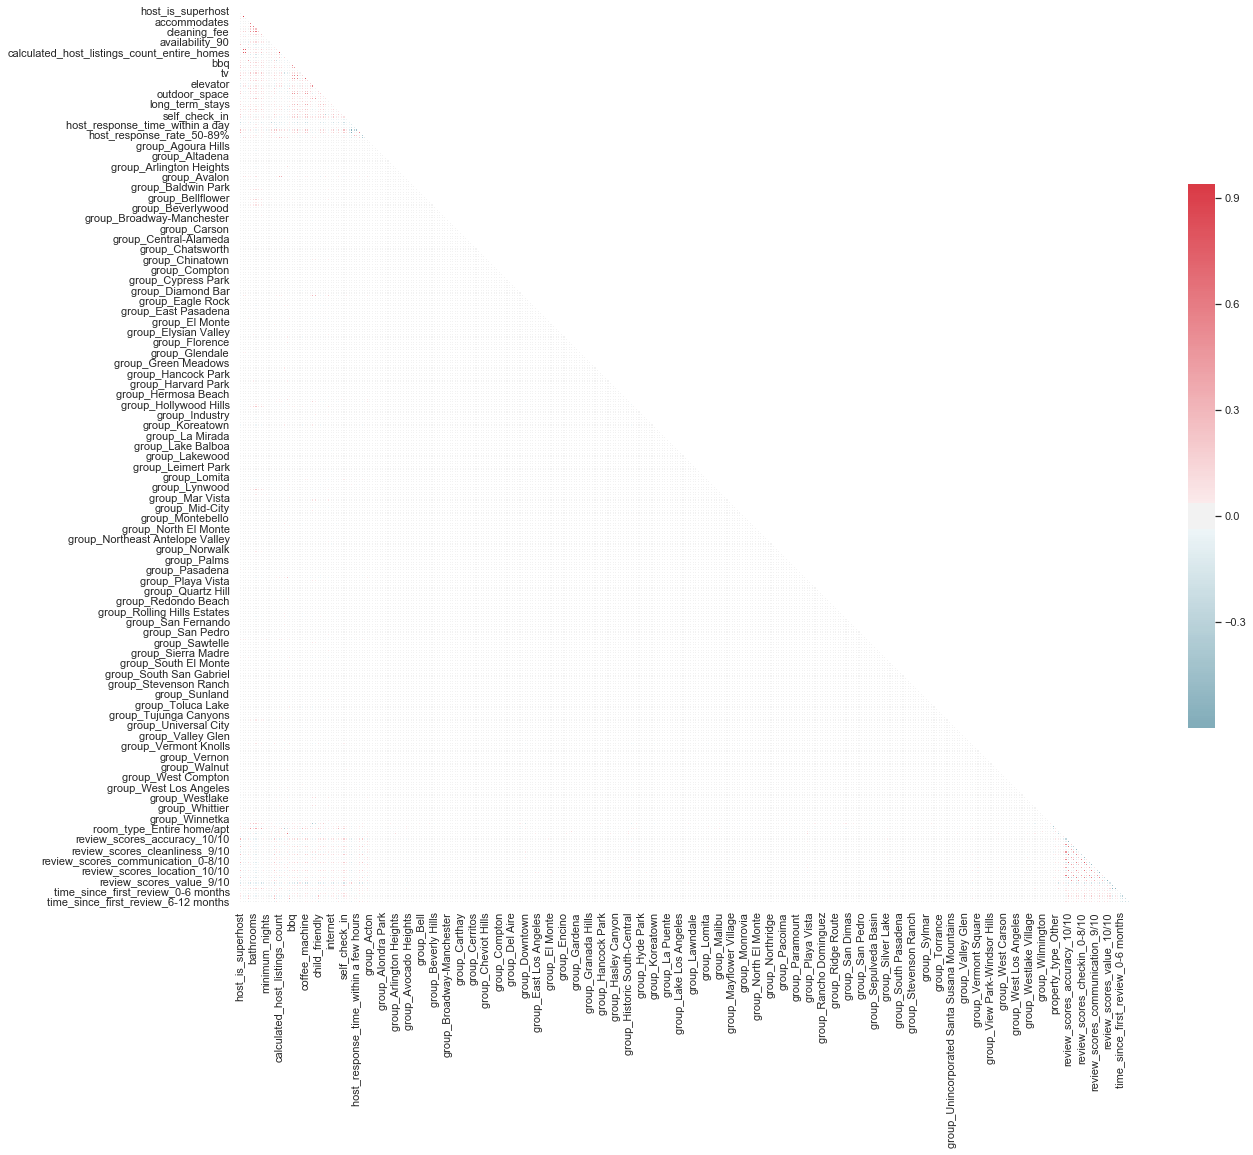

In [84]:

multi_collinearity_heatmap(transformed_df, figsize=(20,20))

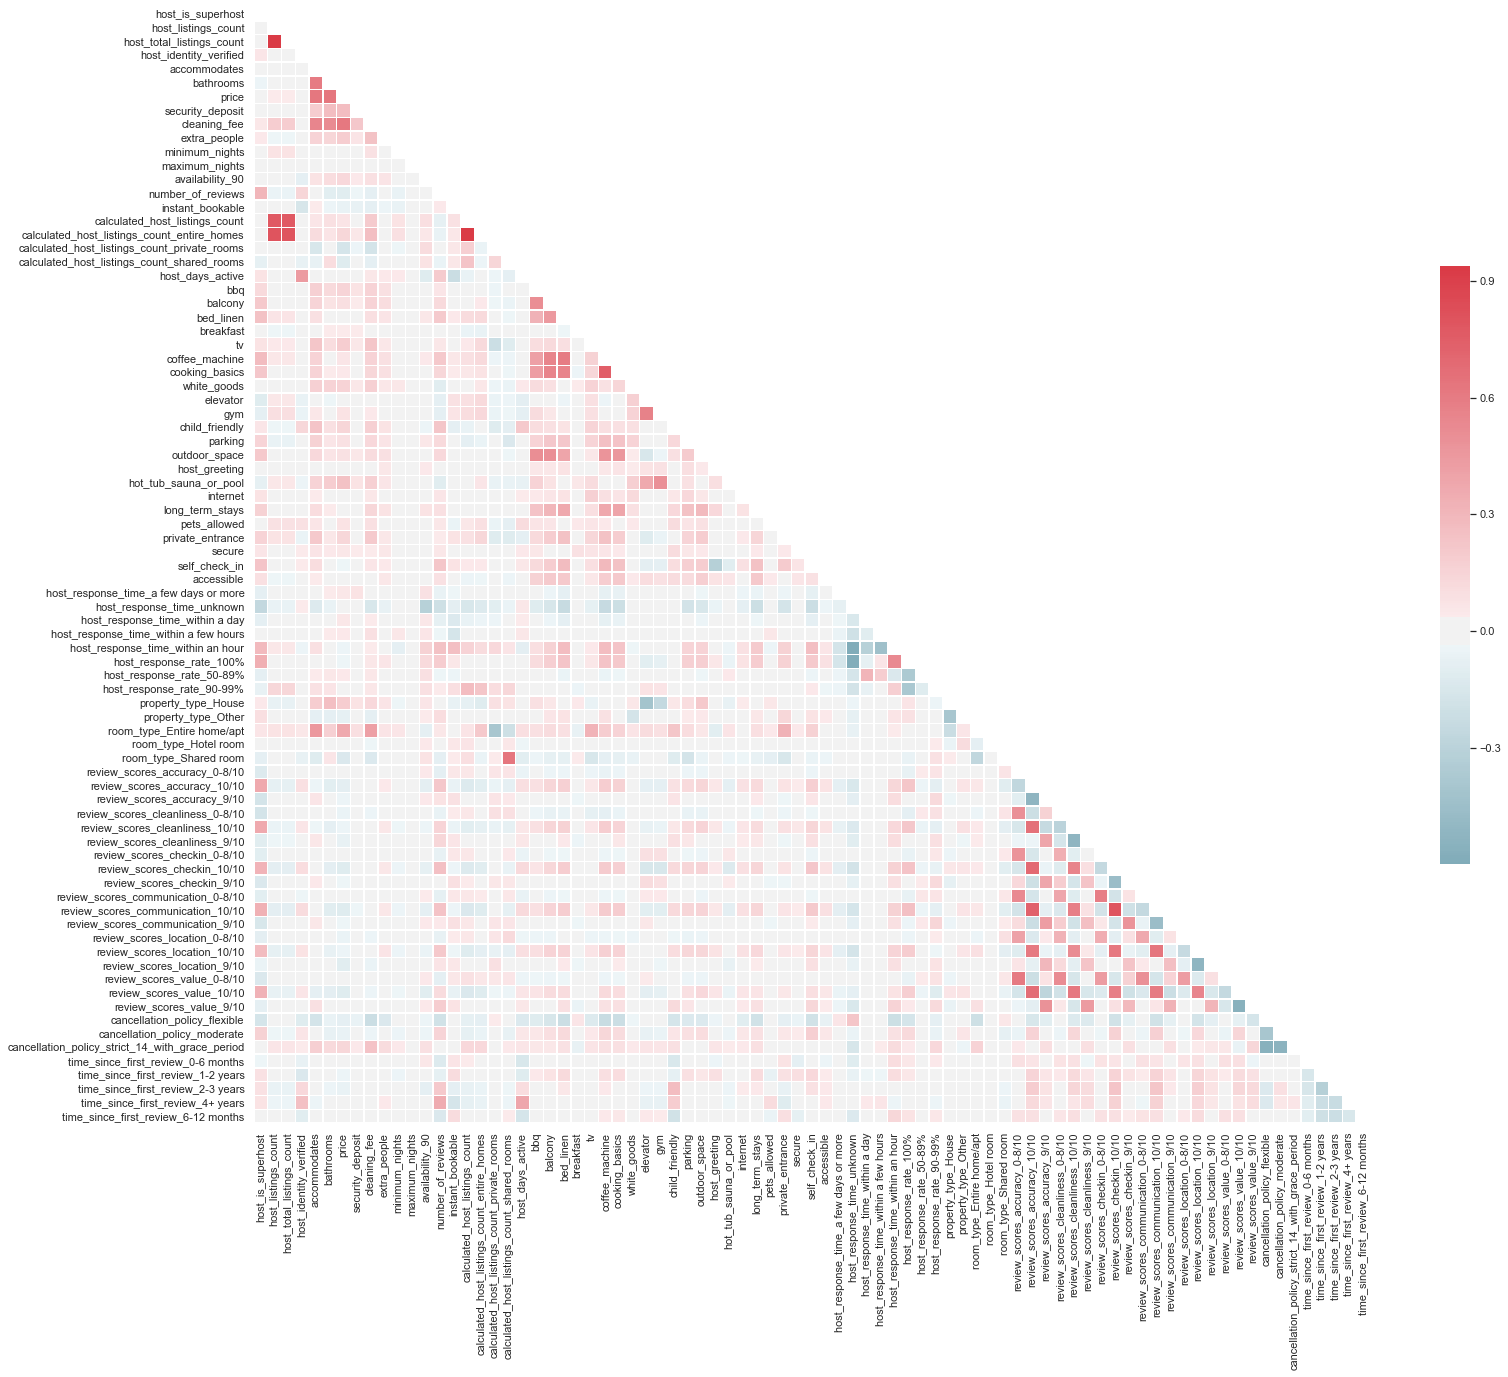

In [85]:

# Final assessment of multi-collinearity
multi_collinearity_heatmap(transformed_df.drop(list(transformed_df.columns[transformed_df.columns.str.startswith('group')]), axis=1), figsize=(25,22))

## Normalizing

In [86]:

numerical_columns = ['accommodates', 'availability_90', 'bathrooms', 'cleaning_fee', 'extra_people', 'host_days_active', 'host_listings_count', 'maximum_nights', 'minimum_nights', 'number_of_reviews', 'price', 'security_deposit']

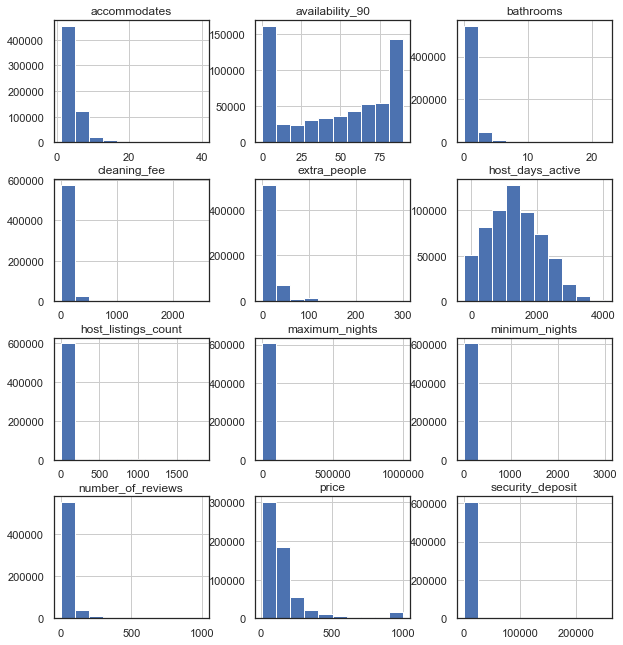

In [87]:
transformed_df[numerical_columns].hist(figsize=(10,11));

In [88]:
# Log transforming columns
numerical_columns = [i for i in numerical_columns if i not in ['availability_90', 'host_days_active']] # Removing items not to be transformed

for col in numerical_columns:
    transformed_df[col] = transformed_df[col].astype('float64').replace(0.0, 0.01) # Replacing 0s with 0.01
    transformed_df[col] = np.log(transformed_df[col])

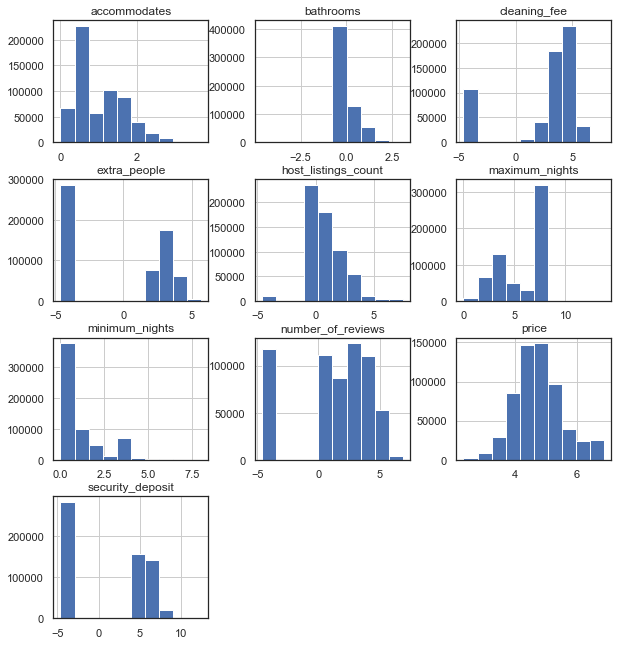

In [89]:
transformed_df[numerical_columns].hist(figsize=(10,11));


This appears to have helped some of the distributions, although some (e.g. cleaning fee, extra people fee and security fee) contain a large number of 0s, which means these features are not normally distributed. Most importantly, however, the target variable price now appears much more normally distributed.


Finally, the predictive features X and the target feature y can be separated, and X will be scaled. StandardScaler from sklearn will be used, but the type of scaling used could be experimented with later to see if alternative versions yield better results.

In [90]:
# Separating X and y
X = transformed_df.drop('price', axis=1)
y = transformed_df.price

# Scaling
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=list(X.columns))

In [91]:
# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

## Model 1 : Linear regression

In [92]:
import numpy as np
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.20, random_state=42)

In [93]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_train, y_train)

0.7381926853729583

In [94]:
y_predict= reg.predict(X_test)

In [95]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_predict)

0.16935170876587605

In [96]:
from sklearn.metrics import r2_score
r2_score(y_test, y_predict)

0.7355513967246283

 ## Model 2 : XGBoost

Before building a neural network, a vanilla XGBoost model will be used to predict price, in order to provide a baseline level of accuracy and a measure of feature importance. This most likely provides the best achievable accuracy using machine learning models (other than possible small accuracy increases from hyper-parameter tuning) due to XGBoost's superior performance.

In [ ]:

xgb_reg_start = time.time()

xgb_reg = xgb.XGBRegressor()
xgb_reg.fit(X_train, y_train)
training_preds_xgb_reg = xgb_reg.predict(X_train)
val_preds_xgb_reg = xgb_reg.predict(X_test)

xgb_reg_end = time.time()

print(f"Time taken to run: {round((xgb_reg_end - xgb_reg_start)/60,1)} minutes")
print("\nTraining MSE:", round(mean_squared_error(y_train, training_preds_xgb_reg),4))
print("Validation MSE:", round(mean_squared_error(y_test, val_preds_xgb_reg),4))
print("\nTraining r2:", round(r2_score(y_train, training_preds_xgb_reg),4))
print("Validation r2:", round(r2_score(y_test, val_preds_xgb_reg),4))

C:\Users\wabug\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:05:52] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:

ft_weights_xgb_reg = pd.DataFrame(xgb_reg.feature_importances_, columns=['weight'], index=X_train.columns)
ft_weights_xgb_reg.sort_values('weight', inplace=True,ascending=False)
ft_weights_xgb_reg



## Neural Network : removing excess review rating features

In [ ]:
def nn_model_evaluation(model, skip_epochs=0, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test):
    """
    For a given neural network model that has already been fit, prints for the train and tests sets the MSE and r squared
    values, a line graph of the loss in each epoch, and a scatterplot of predicted vs. actual values with a line
    representing where predicted = actual values. Optionally, a value for skip_epoch can be provided, which skips that
    number of epochs in the line graph of losses (useful in cases where the loss in the first epoch is orders of magnitude
    larger than subsequent epochs). Training and test sets can also optionally be specified.
    """

    # MSE and r squared values
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    print("Training MSE:", round(mean_squared_error(y_train, y_train_pred),4))
    print("Validation MSE:", round(mean_squared_error(y_test, y_test_pred),4))
    print("\nTraining r2:", round(r2_score(y_train, y_train_pred),4))
    print("Validation r2:", round(r2_score(y_test, y_test_pred),4))
    
    # Line graph of losses
    model_results = model.history.history
    plt.plot(list(range((skip_epochs+1),len(model_results['loss'])+1)), model_results['loss'][skip_epochs:], label='Train')
    plt.plot(list(range((skip_epochs+1),len(model_results['val_loss'])+1)), model_results['val_loss'][skip_epochs:], label='Test', color='green')
    plt.legend()
    plt.title('Training and test loss at each epoch', fontsize=14)
    plt.show()
    
    # Scatterplot of predicted vs. actual values
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    fig.suptitle('Predicted vs. actual values', fontsize=14, y=1)
    plt.subplots_adjust(top=0.93, wspace=0)
    
    ax1.scatter(y_test, y_test_pred, s=2, alpha=0.7)
    ax1.plot(list(range(2,8)), list(range(2,8)), color='black', linestyle='--')
    ax1.set_title('Test set')
    ax1.set_xlabel('Actual values')
    ax1.set_ylabel('Predicted values')
    
    ax2.scatter(y_train, y_train_pred, s=2, alpha=0.7)
    ax2.plot(list(range(2,8)), list(range(2,8)), color='black', linestyle='--')
    ax2.set_title('Train set')
    ax2.set_xlabel('Actual values')
    ax2.set_ylabel('')
    ax2.set_yticklabels(labels='')
    
    plt.show()

In [ ]:
all_review = list(X_train.columns[X_train.columns.str.startswith("review_scores")])
review_to_keep = list(X_train.columns[X_train.columns.str.startswith("review_scores_rating")])
review_to_drop = [x for x in all_review if x not in review_to_keep]

X_train_short = X_train.drop(review_to_drop, axis=1)
X_test_short = X_test.drop(review_to_drop, axis=1)

In [ ]:
# Building the model
nn1 = models.Sequential()
nn1.add(layers.Dense(128, input_shape=(X_train_short.shape[1],), kernel_regularizer=regularizers.l1(0.005), activation='relu'))
nn1.add(layers.Dense(256, kernel_regularizer=regularizers.l1(0.005), activation='relu'))
nn1.add(layers.Dense(256, kernel_regularizer=regularizers.l1(0.005), activation='relu'))
nn1.add(layers.Dense(512, kernel_regularizer=regularizers.l1(0.005), activation='relu'))
nn1.add(layers.Dense(1, activation='linear'))

# Compiling the model
nn1.compile(loss='mean_squared_error',
            optimizer='adam',
            metrics=['mean_squared_error'])

# Model summary
print(nn1.summary())

In [ ]:
# Training the model
nn1_start = time.time()

nn1_history = nn1.fit(X_train_short,
                  y_train,
                  epochs=50,
                  batch_size=256,
                  validation_split=0.1)

nn1_end = time.time()

print(f"Time taken to run: {round((nn1_end - nn1_start)/60,1)} minutes")

In [ ]:
nn_model_evaluation(nn1, skip_epochs=2, X_train=X_train_short, X_test=X_test_short)

## Conclusions and recomendations
 The model was only able to explain 76% of the variation in price. The remaining 24% is probably made up of features that were not present in the data. It is likely that a significant proportion of this unexplained variance is due to variations in the listing photos. The photos of properties on Airbnb are very important in encouraging guests to book, and so can also be expected to have a significant impact on price - better photos (primarily better quality properties and furnishings, but also better quality photography) equal higher prices.
 #### Future Direction
- Find a way to incorporate image quality into the model, e.g. by using the output of a convolutional neural network to assess image quality as an input into the pricing model
- Use better quality/more accurate data which includes the actual average prices paid per night